In [61]:
import pandas as pd
from copy import deepcopy

# for visualisation
import matplotlib.pyplot as plt

# for evaluation metrics
%run -i helper_functions.py

In [33]:
test_labeled = pd.read_csv('Data/test_labeled.csv')
scores_perspective = pd.read_csv('Data/scores_perspective.csv')

In [35]:
test_labeled

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0
1,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0
2,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
3,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
4,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
63973,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0
63974,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0
63975,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0
63976,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0


In [34]:
scores_perspective

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.014011,0.004662,0.001054,0.008634,0.008453,0.015045
1,0.014770,0.226431,0.261968,0.403369,0.028017,0.009204
2,0.022509,0.023077,0.397439,0.284687,0.439468,0.392070
3,0.050671,0.020437,0.005417,0.043836,0.082904,0.119997
4,0.001793,0.013365,0.009841,0.035927,0.023585,0.013425
...,...,...,...,...,...,...
63973,0.031147,0.103928,0.056943,0.028629,0.003948,0.013703
63974,0.040638,0.102216,0.265932,0.411341,0.377959,0.023077
63975,0.169603,0.394096,0.053654,0.568915,0.640770,0.491513
63976,0.944597,0.062706,0.612608,0.808206,0.885522,0.571504


In [36]:
predictions = deepcopy(scores_perspective)
for label in scores_perspective.columns:
    predictions[label] = np.where(predictions[label] >= 0.5, 1, 0)

In [37]:
predictions

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
63973,0,0,0,0,0,0
63974,0,0,0,0,0,0
63975,0,0,0,1,1,0
63976,1,0,1,1,1,1


In [39]:
get_overall_evaluation_score(test_labeled.iloc[:, 2:], predictions, scores_perspective)

Accuracy score:  0.8376629466379067
Precision score:  0.497209397738494
Recall score:  0.5158642571389157
F1 score:  0.4759122600619787
Logarithmic Loss:  0.4896752553086111
ROC AUC score:  0.8961795045167049


In [40]:
rows2exclude = np.where(np.sum(scores_perspective, axis=1)==0)

In [48]:
len(rows2exclude[0])

1854

In [50]:
# drop invalid rows
get_overall_evaluation_score(test_labeled.iloc[:, 2:].drop(rows2exclude[0].tolist()), predictions.drop(rows2exclude[0].tolist()), 
                             scores_perspective.drop(rows2exclude[0].tolist()))

Accuracy score:  0.8349430171914236
Precision score:  0.49715548907711843
Recall score:  0.5264676897085738
F1 score:  0.48078859526614115
Logarithmic Loss:  0.49586713217306877
ROC AUC score:  0.910526106234399


In [42]:
model_scores = pd.read_csv('prediction/LSTM/Baseline_GloVe_predictions.csv', index_col=0)

In [43]:
model_scores = model_scores

In [44]:
model_predictions = deepcopy(model_scores)
for label in model_scores.columns:
    model_predictions[label] = np.where(model_predictions[label] >= 0.5, 1, 0)

In [45]:
model_predictions

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
63973,0,0,0,0,0,0
63974,1,0,1,0,1,0
63975,1,0,0,0,0,0
63976,1,0,1,0,1,0


In [46]:
get_overall_evaluation_score(test_labeled.iloc[:, 2:], model_predictions, model_scores)

Accuracy score:  0.8734877614179875
Precision score:  0.5852391957873924
Recall score:  0.7413436336046352
F1 score:  0.6406206372353421
Logarithmic Loss:  0.2846231201165016
ROC AUC score:  0.9781571455679132


In [58]:
scores_df = pd.DataFrame({'Perspective API':[0.8349, 0.4972, 0.5265, 0.4808, 0.4959, 0.9105], 
                          'Best Performing Model':[0.8735, 0.5852, 0.7413, 0.6406, 0.2846, 0.9782]},
                         index=['Accuracy', 'Precision', 'Recall', 'F1', 'Log Loss', 'ROC AUC'])

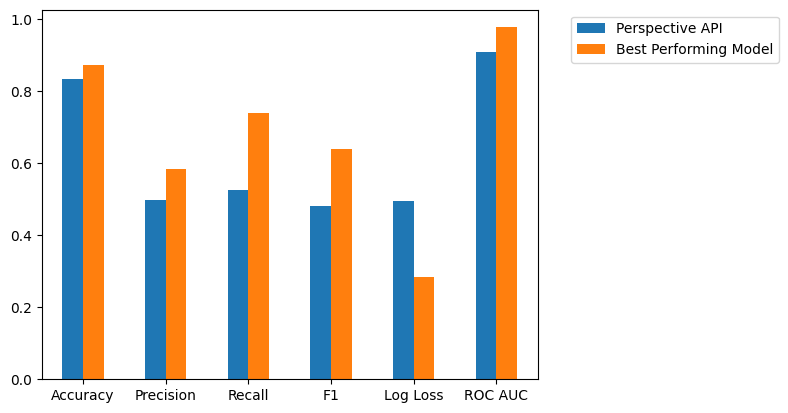

In [63]:
# visualize the comparison
scores_df.plot(kind='bar', rot=0)
plt.legend(bbox_to_anchor=(1.5, 1))
plt.show()